In [110]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

data = pd.read_table('churn_train.txt',sep='\s+', engine='python')

In [111]:
data

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000,0.0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000,0.0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000,1.0
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000,0.0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,41670,2,74,12,"2,81",Moscow,Branch,349,1,1,1,160000,0.0
8301,19167,2,32,13,"2,78",Regions,Branch,344,1,1,1,180000,0.0
8302,16510,1,34,17,"2,74",Saint-Petersbourgh,Online,357,1,0,1,120000,0.0
8303,45094,3,42,20,"2,66",Moscow,Online,272,3,1,1,190000,1.0


In [106]:
data.drop(['client_id'], axis=1, inplace=True)#убираем неполезные значения

In [107]:
unique_values = data['region'].nunique()
unique_values

3

In [117]:
unique_values = data['channel'].nunique()
unique_values

2

In [113]:
one_hot_encoded = pd.get_dummies(data['region'])#нормализуем категориальные признаки

In [114]:
one_hot_encoded

,Moscow,Regions,Saint-Petersbourgh
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
8300,1,0,0
8301,0,1,0
8302,0,0,1
8303,1,0,0


In [115]:
data = pd.concat([data, one_hot_encoded], axis=1)

In [116]:
data

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn,Moscow,Regions,Saint-Petersbourgh
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000,0.0,1,0,0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000,0.0,1,0,0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000,1.0,0,1,0
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000,0.0,1,0,0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,41670,2,74,12,"2,81",Moscow,Branch,349,1,1,1,160000,0.0,1,0,0
8301,19167,2,32,13,"2,78",Regions,Branch,344,1,1,1,180000,0.0,0,1,0
8302,16510,1,34,17,"2,74",Saint-Petersbourgh,Online,357,1,0,1,120000,0.0,0,0,1
8303,45094,3,42,20,"2,66",Moscow,Online,272,3,1,1,190000,1.0,1,0,0


In [118]:
data = pd.get_dummies(data, columns=['channel'], drop_first= True )#нормализуем категориальные признаки 2

In [119]:
data['beh_score'] = data['beh_score'].str.replace(',', '.')

# преобразуем столбец в тип float
data['beh_score'] = data['beh_score'].astype(float)

In [120]:
n_nans = data['churn'].isna().sum()
print('Количество значений NaN в столбце:', n_nans)

Количество значений NaN в столбце: 1


In [121]:
data['churn'].fillna(0, inplace=True)

In [122]:
data['churn'] = data['churn'].astype(int)

In [126]:
data.drop(['region'], axis=1, inplace=True)

In [127]:
data.dtypes

client_id                int64
month_number             int64
age                      int64
lifetime                 int64
beh_score              float64
avg_transaction_sum      int64
total_products           int64
deposit                  int64
is_package               int64
salary_bucket            int64
churn                    int32
Moscow                   uint8
Regions                  uint8
Saint-Petersbourgh       uint8
channel_Online           uint8
dtype: object

In [128]:
data["churn"] = data["churn"].astype(int)
y = data["churn"].values
X = data.drop(labels = ["churn"],axis = 1)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)#разделяем выборку и экспериментируем с выбором модели

In [ ]:
#Пробуем: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier

In [129]:
%%time
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.732691149909693
Wall time: 23 ms


In [130]:
%%time
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.6520168573148706
Wall time: 31 ms


In [131]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7838651414810355
Wall time: 592 ms


In [132]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7886815171583383
Wall time: 623 ms


In [ ]:
#Лучшие результаты показал GradientBoostingClassifier. Найдем лучшие параметры через GridSearchCV

In [133]:
params = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 
              'n_estimators':[1, 10, 25, 50, 100, 250, 500],
              'max_depth': np.arange(3,5,1)
              }

In [134]:
%%time

GS_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), cv=3, param_grid=params, scoring='accuracy')
GS_GBC.fit(X_train, y_train)
y_pred_d = GS_GBC.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_d)
print(accuracy)
print(GS_GBC.best_params_)

0.7904876580373269
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Wall time: 1min 54s


In [135]:
best_params = GS_GBC.best_params_
best_model = GradientBoostingClassifier(**best_params)

# обучим модель на данных
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)

In [136]:
feature_importance = best_model.feature_importances_
feature_importance #выясним какие значения сильнее влияют на выборку

array([0.04601734, 0.0072112 , 0.37537892, 0.00571261, 0.02908597,
       0.07704609, 0.23525758, 0.00176283, 0.14309306, 0.01706308,
       0.00154967, 0.03232004, 0.00874798, 0.01975363])

In [137]:
feature_names = X_train.columns

# отобразим веса переменных вместе с названиями признаков
for name, importance in zip(feature_names, feature_importance):
    print(f"Feature '{name}': {importance:.5f}")

Feature 'client_id': 0.04602
Feature 'month_number': 0.00721
Feature 'age': 0.37538
Feature 'lifetime': 0.00571
Feature 'beh_score': 0.02909
Feature 'avg_transaction_sum': 0.07705
Feature 'total_products': 0.23526
Feature 'deposit': 0.00176
Feature 'is_package': 0.14309
Feature 'salary_bucket': 0.01706
Feature 'Moscow': 0.00155
Feature 'Regions': 0.03232
Feature 'Saint-Petersbourgh': 0.00875
Feature 'channel_Online': 0.01975


In [ ]:
#проверяем значения 

In [142]:
data = pd.read_table('churn_train.txt',sep='\s+', engine='python')

grouped = data.groupby('age')

# подсчет количества уникальных клиентов в каждой стране
unique_customers = grouped['client_id'].nunique()

# подсчет доли оттока клиентов в каждой стране
churn_rate = grouped['churn'].mean()

# создание нового датафрейма с результатами
results = pd.DataFrame({'unique_customers': unique_customers, 'churn_rate': churn_rate})

# сортировка результатов по убыванию доли оттока
results.sort_values('churn_rate', ascending=False, inplace=True)

results = results[results['unique_customers'] > 50]

# вывод результатов
print(results)

     unique_customers  churn_rate
age                              
56                121    0.611570
60                102    0.578431
52                182    0.573770
50                236    0.544304
54                140    0.535714
58                115    0.517241
48                289    0.444828
62                 84    0.416667
64                 65    0.400000
46                383    0.396867
44                455    0.317982
42                554    0.285714
40                706    0.257022
36                772    0.206675
38                762    0.205462
30                563    0.188713
28                391    0.167089
26                301    0.165563
34                745    0.165113
32                675    0.156342
24                192    0.150259
22                108    0.138889
20                 57    0.122807


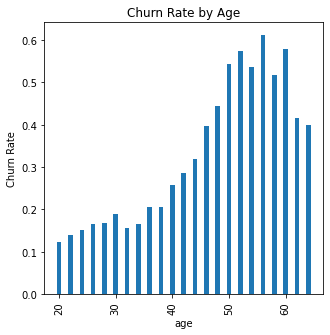

In [143]:
plt.bar(results.index, results['churn_rate'])
plt.xlabel('age')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#После 40 лет наблюдается уверенный рост вероятности оттока

In [149]:
data = pd.read_table('churn_train.txt',sep='\s+', engine='python')

grouped = data.groupby('total_products')

# подсчет количества уникальных клиентов в каждой стране
unique_customers = grouped['client_id'].nunique()

# подсчет доли оттока клиентов в каждой стране
churn_rate = grouped['churn'].mean()

# создание нового датафрейма с результатами
results = pd.DataFrame({'unique_customers': unique_customers, 'churn_rate': churn_rate})

# сортировка результатов по убыванию доли оттока
results.sort_values('churn_rate', ascending=False, inplace=True)



# вывод результатов
print(results)

                unique_customers  churn_rate
total_products                              
4                             47    0.914894
3                            218    0.756881
1                           3965    0.323839
2                           3670    0.169386


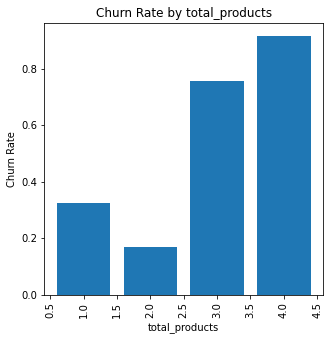

In [150]:
plt.bar(results.index, results['churn_rate'])
plt.xlabel('total_products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by total_products')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#высокая вероятность оттока при наличии от трех продуктов

In [ ]:
is_package

In [151]:
data = pd.read_table('churn_train.txt',sep='\s+', engine='python')

grouped = data.groupby('is_package')

# подсчет количества уникальных клиентов в каждой стране
unique_customers = grouped['client_id'].nunique()

# подсчет доли оттока клиентов в каждой стране
churn_rate = grouped['churn'].mean()

# создание нового датафрейма с результатами
results = pd.DataFrame({'unique_customers': unique_customers, 'churn_rate': churn_rate})

# сортировка результатов по убыванию доли оттока
results.sort_values('churn_rate', ascending=False, inplace=True)

# вывод результатов
print(results)

            unique_customers  churn_rate
is_package                              
0                       3808    0.317853
1                       4084    0.219121


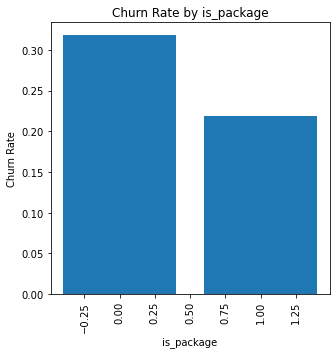

In [152]:
plt.bar(results.index, results['churn_rate'])
plt.xlabel('is_package')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by is_package')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# клиенты с пакетом услуг с большей вероятностью уйдут